In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

import numpy as np
from pythtb import *
from pythTB_wan import Bloch, K_mesh, Wannier
import models

import matplotlib.pyplot as plt

/Users/treycole/Codes/WanPy/top_obstruction


In [2]:
# tight-binding parameters
delta = 1
t = 1
t2 = -0.3

n_super_cell = 2
model = models.Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

#############

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)
lat_vecs = model.get_lat()
recip_lat_vecs = model.get_recip_lat_vecs()
orb_vecs = model.get_orb()
n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

model_str = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}'

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Chern # occupied: {chern: .1f}")

Low energy sites: [0 2 4 6]
High energy sites: [1 3 5 7]
Chern # occupied:  1.0


In [3]:
### Trial wavefunctions
omit_sites = 6
tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) 
# tf_list = list(low_E_sites)

n_tfs = len(tf_list)
Wan_frac = n_tfs/n_occ

save_sfx = model_str + f'_tfx={np.array(tf_list, dtype=int)}'

print(f"Trial wavefunctions: {tf_list}")
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")
print(save_sfx)

Trial wavefunctions: [np.int64(0), np.int64(2), np.int64(4)]
# of Wannier functions: 3
# of occupied bands: 4
Wannier fraction: 0.75
C=1.0_Delta=1_t=1_t2=-0.3_tfx=[0 2 4]


(<Figure size 640x480 with 2 Axes>, <Axes: ylabel='Energy $E(\\mathbf{{k}})$'>)

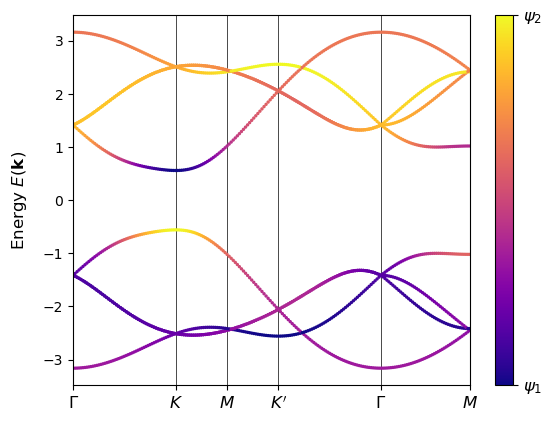

In [4]:
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
k_label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')
(k_vec, k_dist, k_node) = model.k_path(k_path, 101, report=False)

model.plot_bands(
    k_path, k_label=k_label, nk=201, scat_size=2, red_lat_idx=high_E_sites, cmap='plasma'
    )

In [5]:
sv_dir = 'data'
if not os.path.exists(sv_dir):
    os.makedirs(sv_dir)
    
sv_prefix = 'WF_max_loc'
file_name = f"{sv_dir}/{sv_prefix}_{save_sfx}"

WF = np.load(f"{file_name}.npy", allow_pickle=True).item()

In [109]:
nks = 40, 40
WF = Wannier(model, nks)

# initial projection
WF.single_shot(tf_list)
# subspace selection
iter_num = 100000
WF.subspace_selec(iter_num=iter_num, tol=1e-10, verbose=True)
# second projection
psi_til_til = WF.get_psi_tilde(
        WF.tilde_states._psi_wfs, WF.trial_wfs, 
        state_idx=list(range(WF.tilde_states._psi_wfs.shape[2]))
        )
WF.set_tilde_states(psi_til_til, cell_periodic=False)
# max-loc
iter_num = 100000
WF.max_loc(eps=1e-3, iter_num=iter_num, tol=1e-10, grad_min=1e-10, verbose=True)

0 Omega_I: 0.6923538973135636
1 Omega_I: 0.6913136369845916
2 Omega_I: 0.6903159892914538
3 Omega_I: 0.6893550585601479
4 Omega_I: 0.6884261210970337
5 Omega_I: 0.6875253362777555
6 Omega_I: 0.68664954292282
7 Omega_I: 0.6857961115300438
8 Omega_I: 0.6849628345441768
9 Omega_I: 0.6841478433238295
10 Omega_I: 0.6833495443098927
11 Omega_I: 0.6825665692870295
12 Omega_I: 0.6817977361670354
13 Omega_I: 0.681042017746142
14 Omega_I: 0.680298516583036
15 Omega_I: 0.6795664446293428
16 Omega_I: 0.6788451065886065
17 Omega_I: 0.6781338862264112
18 Omega_I: 0.6774322350370079
19 Omega_I: 0.6767396628051885
20 Omega_I: 0.6760557297037646
21 Omega_I: 0.6753800396427383
22 Omega_I: 0.6747122346453034
23 Omega_I: 0.6740519900708003
24 Omega_I: 0.673399010539824
25 Omega_I: 0.6727530264443073
26 Omega_I: 0.6721137909473538
27 Omega_I: 0.6714810773946395
28 Omega_I: 0.6708546770734254
29 Omega_I: 0.6702343972659064
30 Omega_I: 0.669620059553078
31 Omega_I: 0.6690114983323738
32 Omega_I: 0.6684085595

In [110]:
WF.report()

Wannier function report
 --------------------- 
Quadratic spreads:
w_0 --> 0.20242
w_1 --> 0.20242
w_2 --> 0.20242
Centers:
w_0 --> [0.16123 0.16123]
w_1 --> [0.16123 0.67754]
w_2 --> [0.67754 0.16123]
Omega_i = 0.5726421678938323
Omega_tilde = 0.0346127726654675


(-20.0, 20.0)

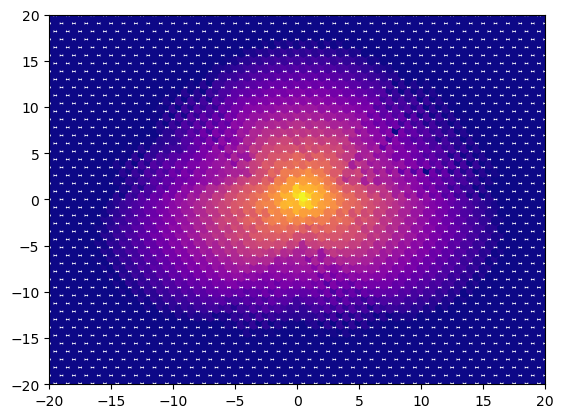

In [122]:
WF.plot_density(0, show_lattice=False, lat_size=2, cbar=False, return_fig=True, interpolate=False)
plt.xlim(-20, 20)
plt.ylim(-20, 20)


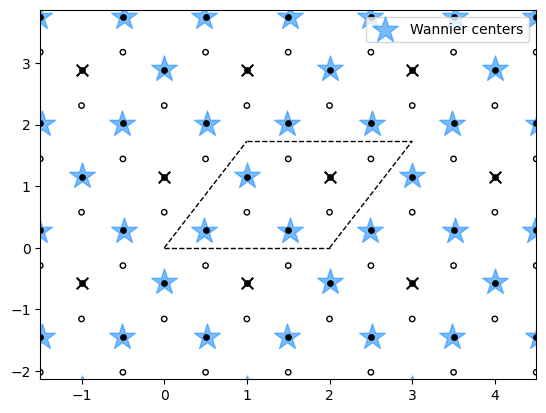

In [114]:
kwargs_centers = {'marker': '*', 'c': 'dodgerblue', 'alpha': 0.6} 
kwargs_omit = {'s': 70, 'marker': 'x', 'c': 'k', 'zorder': 3} 
kwargs_lat = {'s': 15, 'marker': 'o', 'c': 'k'} 

fig, ax = WF.plot_centers(
    center_scale=50, omit_sites=[omit_sites], section_home_cell=True, 
    color_home_cell=True, translate_centers=True, kwargs_centers=kwargs_centers, 
    kwargs_lat=kwargs_lat, kwargs_omit=kwargs_omit, pmx=3, pmy=3, legend=True)

In [123]:
# interpolated energies and states 
interp_energies, interp_unk_til = WF.interp_energies(k_vec, ret_eigvecs=True)

In [124]:
nks = WF.K_mesh.nks
Nk = np.prod(nks)
N_cells = np.prod([ nk -1 for nk in nks])
A_plaq = model.get_recip_vol() / (N_cells)

# Energy eigstates on full mesh
Bloch_en = WF.energy_eigstates
u_energy = Bloch_en.get_states()["Cell periodic"]  # energy eigenstates
P, Q = Bloch_en.get_projector(return_Q=True)  # full band projector

# occupied energy eigenstates
u_occ = u_energy[..., :n_occ, :]  # occupied energy eigenstates
Bloch_occ = Bloch(model, u_occ.shape[0], u_occ.shape[1])
Bloch_occ.set_wfs(u_occ, cell_periodic=True)
P_occ, Q_occ = Bloch_occ.get_projector(return_Q=True)

# tilde states
Bloch_tilde = WF.tilde_states
u_tilde = Bloch_tilde.get_states()["Cell periodic"]  # reduced tilde states
P_tilde, Q_tilde = Bloch_tilde.get_projector(return_Q=True)  # tilde space projectors

# topological states
P_diff = P_occ - P_tilde  # complementary subspace
eigvals, eigvecs = np.linalg.eigh(P_diff)  # states spanning complement
u_comp = eigvecs[..., :, -1]  # take state with non-zero eigval
u_comp = u_comp[..., np.newaxis, :]  # single state
Bloch_comp = Bloch(model, u_comp.shape[0], u_comp.shape[1])
Bloch_comp.set_wfs(u_comp, cell_periodic=True)

In [125]:
# Occupied states
Berry_curv = Bloch_occ.berry_flux_plaq() / A_plaq
omega_i_k = Bloch_occ.trace_metric() #[..., np.newaxis]
omega_i = np.sum(omega_i_k) / Nk

# Reduced (trivial) states  
Berry_curv_til = Bloch_tilde.berry_flux_plaq() / A_plaq
omega_i_k_til = Bloch_tilde.trace_metric() #[..., np.newaxis]
omega_i_til = np.sum(omega_i_k_til) / Nk
omega_til_til = Bloch_tilde.omega_til()

# Complementary (topological) states 
Berry_curv_comp = Bloch_comp.berry_flux_plaq() / A_plaq
omega_i_k_comp = Bloch_comp.trace_metric() #[..., np.newaxis]
omega_i_comp = np.sum(omega_i_k_comp) / Nk
omega_til_comp = Bloch_comp.omega_til()

In [126]:
print(np.amax([np.amax(Berry_curv), np.amax(Berry_curv_comp), np.amax(Berry_curv_til)]))
print(np.amax([np.amax(omega_i_k), np.amax(omega_i_k_comp), np.amax(omega_i_k_til)]))

1.863684374243917
(1.9472626695667608-3.1637562458061706e-16j)


In [127]:
# metric inequality
print((~(abs(Berry_curv) <= omega_i_k)).nonzero())
print((~(abs(Berry_curv_til) <= omega_i_k_til)).nonzero())
print((~(abs(Berry_curv_comp) <= omega_i_k_comp)).nonzero())

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [128]:
Berry_curv_comp[9, 3]

np.float64(0.518096706624641)

In [129]:
omega_i_k_comp[9, 3]

np.complex128(0.6089111515824303+1.168832168589502e-15j)

In [ ]:
print(f"Chern occupied: {A_plaq * np.sum(Berry_curv)/(2*np.pi)}")
print(f"Chern reduced: {A_plaq * np.sum(Berry_curv_til)/(2*np.pi)}")
print(f"Chern complement: {A_plaq * np.sum(Berry_curv_comp)/(2*np.pi)}")

Chern occupied: 1.0000000000000002
Chern reduced: 2.1183135476379215e-16
Chern complement: 0.9999999999999999


In [132]:
print(f"Omega_I occupied: {omega_i}")
print(f"Omega_I reduced: {omega_i_til}")
print(f"Omega_I complement: {omega_i_comp}")
print(f"Omega_tilde reduced: {omega_til_til}")
print(f"Omega_tilde comeplement: {omega_til_comp}")

Omega_I occupied: (0.5905928994534518+7.718845619104047e-17j)
Omega_I reduced: (0.5726421678916623-1.4694576698457283e-16j)
Omega_I complement: (0.6340979619779639-1.22520030829885e-18j)
Omega_tilde reduced: 0.0346127726654675
Omega_tilde comeplement: 17.35069172468812


# Quantum Metric

In [133]:
k_mesh = Bloch_en.K_mesh
full_mesh = k_mesh.gen_k_mesh(endpoint=False)
full_mesh_mat = k_mesh.gen_k_mesh(flat=False, endpoint=False)
mesh_Cart = full_mesh_mat @ recip_lat_vecs

KX = mesh_Cart[:, :, 0]
KY = mesh_Cart[:, :, 1]

kx_shape = KX.shape[0]
ky_shape = KY.shape[0]

# Define the number of tiles in each direction
Nx, Ny = 3, 3  # Number of times to tile in x and y directions

# Expand KX, KY, and omega_i_k to the size of the tiled grid
KX_tiled = np.tile(KX, (Nx, Ny))  # Tile KX Nx times along x and Ny times along y
KY_tiled = np.tile(KY, (Nx, Ny))

# Apply reciprocal lattice translations to each tile
for i in range(Nx):
    for j in range(Ny):
        # Apply the appropriate translation for each tile
        KX_tiled[i *kx_shape :(i + 1) * kx_shape, j * ky_shape:(j + 1) * ky_shape] += i * recip_lat_vecs[0, 0] + j * recip_lat_vecs[1, 0]
        KY_tiled[i * kx_shape:(i + 1) * kx_shape, j * ky_shape:(j + 1) * ky_shape] += i * recip_lat_vecs[0, 1] + j * recip_lat_vecs[1, 1]

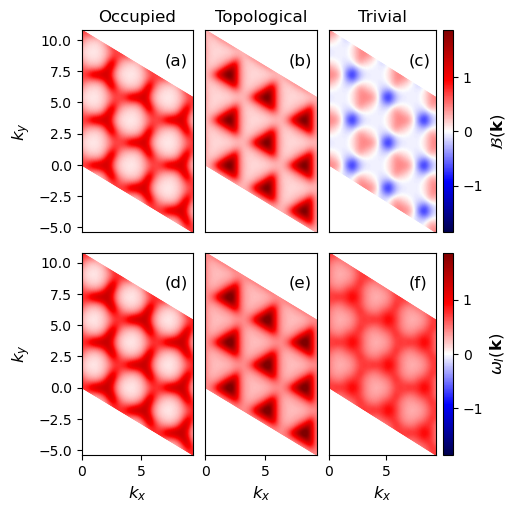

In [144]:
fig = plt.figure(figsize=(5, 5))
gs = fig.add_gridspec(2, 3, wspace=0.1, hspace=0.1, width_ratios=[1, 1, 1.28])
ax = gs.subplots(sharex='col', sharey='row')

###################### Berry Curve #######################

max_Bcurv = np.amax([np.amax(Berry_curv), np.amax(Berry_curv_comp), np.amax(Berry_curv_til)])
vmin, vmax = -max_Bcurv.real, max_Bcurv.real

### occupied subspace
Berry_curv_tiled = np.tile(Berry_curv, (Nx, Ny))
im = ax[0,0].pcolormesh(KX_tiled, KY_tiled, Berry_curv_tiled, cmap='seismic', shading='gouraud', vmin=vmin, vmax=vmax)
# plt.colorbar(im, label=r'$\Omega(\mathbf{k})$')

# ax[0,0].set_xlabel('$k_x$', size=12)
ax[0,0].xaxis.set_visible(False)
# ax[0,0].yaxis.set_visible(False)
ax[0,0].set_ylabel('$k_y$', size=12)
ax[0,0].set_title(r'Occupied')
# ax[0,0].set_aspect('equal')

### reduced subspace
Berry_curv_tiled = np.tile(Berry_curv_til, (Nx, Ny))

im = ax[0,2].pcolormesh(KX_tiled, KY_tiled, Berry_curv_tiled, cmap='seismic', shading='gouraud', vmin=vmin, vmax=vmax)
cb = plt.colorbar(im, fraction=0.2)
cb.set_label('$\mathcal{B}(\mathbf{k})$', size=12)

# ax[0,2].set_xlabel('$k_x$', size=12)
ax[0,2].xaxis.set_visible(False)
ax[0,2].yaxis.set_visible(False)
ax[0,2].set_title(r'Trivial')
# ax[0,2].set_aspect('equal')

### complementary subspace
# omega_i_k_tiled = np.tile(omega_i_k_comp[:, :, 0].real, (Nx, Ny))
Berry_curv_tiled = np.tile(Berry_curv_comp, (Nx, Ny))

# Plotting
im = ax[0,1].pcolormesh(KX_tiled, KY_tiled, Berry_curv_tiled, cmap='seismic', shading='gouraud', vmin=vmin, vmax=vmax)
# plt.colorbar(im, label=r'$\Omega(\mathbf{k})$', fraction=0.087)

# ax[0,1].set_xlabel('$k_x$', size=12)
ax[0,1].xaxis.set_visible(False)
ax[0,1].yaxis.set_visible(False)
ax[0,1].set_title(r'Topological')
# ax[0,1].set_aspect('equal')

################## omega_I ##########################

# vmin = 0
# vmax = np.amax([np.amax(omega_i_k), np.amax(omega_i_k_comp), np.amax(omega_i_k_til)]).real

### occupied subspace
omega_i_k_tiled = np.tile(omega_i_k.real, (Nx, Ny))
im = ax[1, 0].pcolormesh(KX_tiled, KY_tiled, omega_i_k_tiled, cmap='seismic', shading='gouraud', vmin=vmin, vmax=vmax)
# plt.colorbar(im, label=r'$\omega_I(\mathbf{k})$')

ax[1, 0].set_xlabel('$k_x$', size=12)
ax[1, 0].set_ylabel('$k_y$', size=12)
# ax[1, 0].set_title(r'Occupied')
# ax[1, 0].set_aspect('equal')

### reduced subspace
omega_i_k_tiled = np.tile(omega_i_k_til.real, (Nx, Ny))

# vmin, vmax = 0.000, np.amax(omega_i_k_comp)
# vmin, vmax = None, None
im = ax[1, 2].pcolormesh(KX_tiled, KY_tiled, omega_i_k_tiled, cmap='seismic', shading='gouraud', vmin=vmin, vmax=vmax)
cb = plt.colorbar(im, fraction=0.2)
# cb.set_ticks([0, 1])
cb.set_label('$\omega_I(\mathbf{k})$', size=12)

ax[1, 2].set_xlabel('$k_x$', size=12)
ax[1, 2].yaxis.set_visible(False)
# ax[1, 2].set_title(r'Reduced')
# ax[1, 2].set_aspect('equal')

### complementary subspace
omega_i_k_tiled = np.tile(omega_i_k_comp.real, (Nx, Ny))

# vmin, vmax = 0.000, np.amax(omega_i_k_comp)
# vmin, vmax = None, None
im = ax[1,1].pcolormesh(KX_tiled, KY_tiled, omega_i_k_tiled, cmap='seismic', shading='gouraud', vmin=vmin, vmax=vmax)
# plt.colorbar(im, label=r'$\Omega(\mathbf{k})$', fraction=0.087)

ax[1, 1].set_xlabel('$k_x$', size=12)
ax[1, 1].yaxis.set_visible(False)
# ax[1, 1].set_title(r'Complementary')
# ax[1, 1].set_aspect('equal')

# plt.subplots_adjust(wspace=-0.5)

let = np.array([['a', 'b', 'c'], ['d', 'e', 'f']])
for row in range(ax.shape[0]):
    for col in range(ax.shape[1]):
        ax[row, col].text(7, 8, f'({let[row, col]})', size=12)

plt.subplots_adjust(top=0.95, left=0.14, bottom=0.1, right=0.92)
# fig.set_constrained_layout_pads(w_pad=-0.5)
plt.savefig(f"images/berry_curv_and_omega_I_{save_sfx}.png", dpi=700)

In [135]:
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
k_label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')
# k_path = [[0, 0], [-.5, -.5], [0,0], [.5, .5]]
# k_label = (r'$\Gamma $', r'$M$', r'$\Gamma $', r'$M$')
(k_vec, k_dist, k_node) = model.k_path(k_path, 101, report=False)

Berry_curv_comp_path = Bloch_comp.interp_op(Berry_curv_comp, k_vec, plaq=True)
Berry_curv_til_path = Bloch_tilde.interp_op(Berry_curv_til, k_vec, plaq=True)
Berry_curv_path = Bloch_occ.interp_op(Berry_curv, k_vec, plaq=True)

omega_i_k_path = Bloch_occ.interp_op(omega_i_k, k_vec)
omega_i_k_til_path = Bloch_tilde.interp_op(omega_i_k_til, k_vec)
omega_i_k_comp_path = Bloch_comp.interp_op(omega_i_k_comp, k_vec)

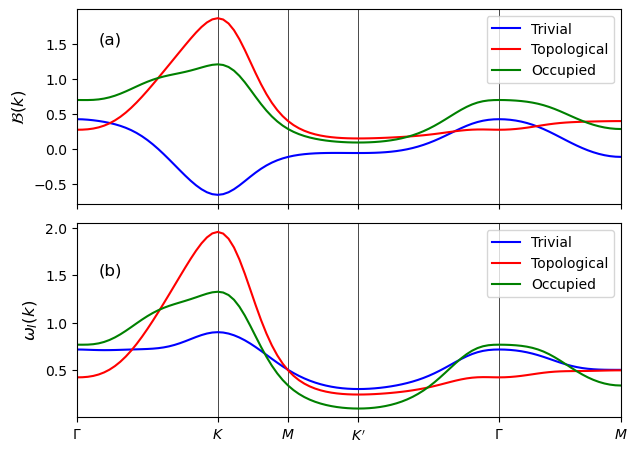

In [141]:
fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].set_xlim(0, k_node[-1])
ax[0].set_xticks(k_node)
for n in range(len(k_node)):
    ax[0].axvline(x=k_node[n], linewidth=0.5, color='k')
if k_label is not None:
    ax[0].set_xticklabels(k_label, size=12)

ax[0].plot(k_dist, Berry_curv_til_path.real, c='b', label='Trivial')
ax[0].plot(k_dist, Berry_curv_comp_path.real, c='r', label='Topological')
ax[0].plot(k_dist, Berry_curv_path.real, c='g', label='Occupied')
ax[0].set_ylabel(r'$\mathcal{B}(k)$', size=12)
ax[0].legend()
ax[0].text(0.05, 1.5, '(a)', size=12)

ax[1].set_xlim(0, k_node[-1])
ax[1].set_xticks(k_node)
for n in range(len(k_node)):
    ax[1].axvline(x=k_node[n], linewidth=0.5, color='k')
# if k_label is not None:
#     ax[1].set_xticklabels(k_label, size=12)

ax[1].plot(k_dist, omega_i_k_til_path.real, c='b', label='Trivial')
ax[1].plot(k_dist, omega_i_k_comp_path.real, c='r', label='Topological')
ax[1].plot(k_dist, omega_i_k_path.real, c='g', label='Occupied')
ax[1].set_ylabel(r'$\omega_I(k)$', size=12)
ax[1].legend()
ax[1].text(0.05, 1.5, '(b)', size=12)

plt.subplots_adjust(top=0.95, left=0.12, bottom=0.1, right=0.97, hspace=0.1)
plt.savefig(f"images/berry_curv_and_omega_I_interp_{save_sfx}.png", dpi=700)